#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath('')).parent.parent)
sys.path.insert(0, nb_path)
print(f'Added {nb_path} to system path')

# This computer git repos
from project.project_manager_module import ProjectManager

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure5"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Data context for multiple analyzes and visualizations

In [4]:
to_spa_dict = {
    "startpoints": ["Comrad", "Bacon", "Hifi"],
    "parameters": ["C"],
    "analyzes": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        "Excitatory Firing Rate",
    ],
}

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="",
    matlab_workspace_file="",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    to_spa_dict=to_spa_dict,
    project=project,
    experiment=experiment,
)

### Vizualize mean of 10 iterations, results precalculated

In [6]:
# Copy precalculated results to experiment folders
input_folder_list = [
    "precalculated_results/Single_narrow_iteration_R1/Comrad_C_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_C_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/HiFi_C_compiled_results", 
]
# These will appear under experiment_path
output_folder_list = [
    "Comrad_C_compiled_results",
    "Bacon_C_compiled_results",
    "HiFi_C_compiled_results",
]
for this_input, this_output in zip(input_folder_list, output_folder_list):
    PM.transfer_precalculated_results(input_folder=this_input, output_folder=this_output, verbose=False)

In [7]:
PM.viz.save_figure_with_arrayidentifier = f'Fig5_Comrad'
PM.viz.save_figure_to_folder = f"Analysis_Figures"
plt.rcParams['figure.figsize'] = (16, 4)

### Figure 4
#### Comparison of information quantities between Comrad, Bacon and HiFi at varying capacitance.

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_Comrad_Co_vs_Me_XY.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_Comrad_Co_vs_Me_XY.png


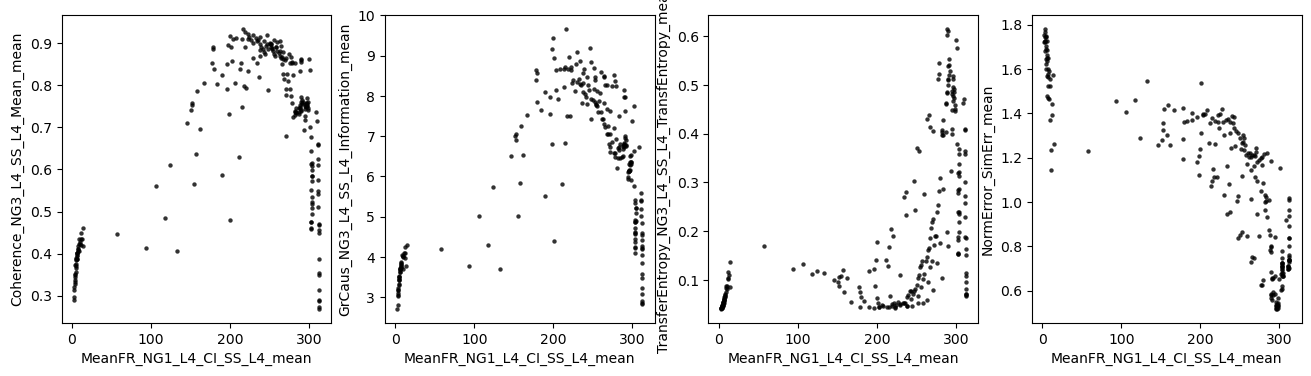

In [8]:
        """
    Show xy plot allows any parametric data plotted against each other.
    Uses seaborn regplot or lineplot. Seaborn options easy to include into code (viz_module).
    All analyzes MUST be included into to_spa_dict
    Same data at the x and y axis simultaneously can be used with regplot.
    If compiled_type is accuracy, and only mean datatype is available, 
    uses the mean. 

    startpoints: 'Comrad', 'HiFi', 'Bacon'
    parameters: 'C', 'gL', 'VT', 'EL', 'delay'
    analyzes: 
    'Coherence', 'Granger Causality', 'Transfer Entropy', 'Simulation Error', 'Excitatory Firing Rate', 'Inhibitory Firing Rate', 'Euclidean Distance'

    kind: regplot, binned_lineplot 
        regplot is scatterplot, where only single startpoint and parameter should be plotted at a time. draw_regression available.
        binned_lineplot bins x-data, then compiles parameters/startpoints and finally shows distinct startpoints/parameters (according to "hue") with distinct hues. Error shading 
        indicates 95% confidence interval, obtained by bootstrapping the data 1000 times (seaborn default)
    """
xy_plot_dict = {
    "x_ana": ["Excitatory Firing Rate",],  
    "x_start": ["Comrad",],  
    "x_para": ["C"],  
    "x_ave": False,  
    "y_ana": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        ],  
    "y_start": ["Comrad",],  
    "y_para": ["C"],  
    "y_ave": False,  
    "kind": "regplot",  # binned_lineplot, regplot
    "n_bins": 10,  # ignored for regplot
    "hue": "startpoint",  # Ignored for regplot
    "compiled_results": True, 
    "compiled_type": "mean",  # mean, accuracy; falls back to mean if accuracy not found
    "draw_regression": False,  # only for regplot
    "order": 1,  # Regression polynomial fit order, only for regplot
    "draw_diagonal": False,  # only for regplot
    "xlog": False,
    "ylog": False,
    "sharey": False,
}

PM.viz.show_xy_plot(xy_plot_dict)

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_Bacon_Co_vs_Me_XY.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_Bacon_Co_vs_Me_XY.png


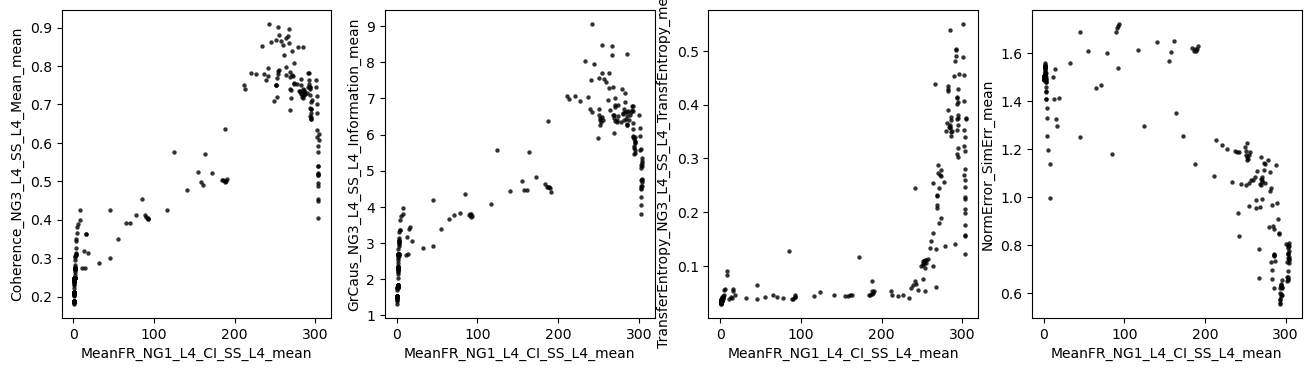

In [9]:
PM.viz.save_figure_with_arrayidentifier = f'Fig5_Bacon'
xy_plot_dict["x_start"] = xy_plot_dict["y_start"] =  "Bacon"
PM.viz.show_xy_plot(xy_plot_dict)

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_HiFi_Co_vs_Me_XY.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure5\Analysis_Figures\Fig5_HiFi_Co_vs_Me_XY.png


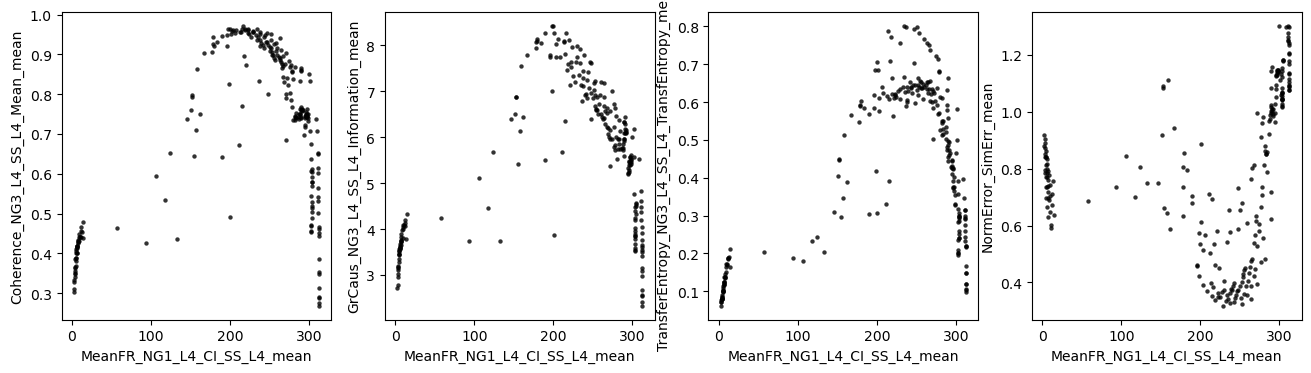

In [10]:
PM.viz.save_figure_with_arrayidentifier = f'Fig5_HiFi'
xy_plot_dict["x_start"] = xy_plot_dict["y_start"] =  "HiFi"
PM.viz.show_xy_plot(xy_plot_dict)